# CCZ Building Block

In [6]:
%load_ext autoreload
%autoreload 2
    
from qiskit import QuantumCircuit, transpiler
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info.operators import Operator
import numpy as np

circuit = QuantumCircuit(3)
circuit.x(0)
circuit.ccx(0, 1, 2)
circuit.rz(np.pi, 2)
circuit.ccx(0, 1, 2)
circuit.x(0)

circuit.draw()
pauli_op = SparsePauliOp.from_operator(Operator(circuit))

print(pauli_op)

SparsePauliOp(['ZII', 'ZIZ', 'ZZI', 'ZZZ'],
              coeffs=[0.-0.5j, 0.+0.5j, 0.-0.5j, 0.-0.5j])


# CCZ Gate Experiments

In [43]:
from utils.sat_utils import uniformly_random_independent_clauses

multi_qubit_stats = []

for num_clauses in range(5, 51, 5):
    clauses = uniformly_random_independent_clauses(num_clauses)
    atoms = []
    curr_aod_row, curr_aod_col = 0, 0
    curr_slm_row, curr_slm_col = 1, 0
    for atom in range(3 * num_clauses):
        if atom % 3 == 0:
            atoms.append(Atom(atom, True, curr_slm_row, curr_slm_col))
            curr_slm_col += 1
        else:
            atoms.append(Atom(atom, False, curr_aod_row, curr_aod_col))
            curr_aod_col += 1
    color_map = [clauses]
    slm_layout = TriangularLayout(FPQA.INTERACTION_RADIUS, 2, num_clauses * 3)
    aod_layout = AOD(FPQA.INTERACTION_RADIUS, 1, num_clauses * 3)
    fpqa = FPQA(slm_layout, aod_layout, atoms)
    color_executor = ColorExecutor(color_map, fpqa)
    multi_qubit_stats.append(color_executor.multi_qubit_execution_stats(0))

multi_qubit_stats

[{'duration': 27.536363636363635,
  'idle_fidelity': 0.9997577519225627,
  'fidelity': 0.7442217159914505,
  'num_local_raman_pulses': 53,
  'num_global_rydberg_pulses': 4},
 {'duration': 49.03636363636363,
  'idle_fidelity': 0.9990794191463035,
  'fidelity': 0.5536242804988052,
  'num_local_raman_pulses': 106,
  'num_global_rydberg_pulses': 4},
 {'duration': 69.53636363636365,
  'idle_fidelity': 0.9979956025535047,
  'fidelity': 0.4124965546786704,
  'num_local_raman_pulses': 157,
  'num_global_rydberg_pulses': 4},
 {'duration': 89.03636363636365,
  'idle_fidelity': 0.9965379670068647,
  'fidelity': 0.30784432542570767,
  'num_local_raman_pulses': 206,
  'num_global_rydberg_pulses': 4},
 {'duration': 112.53636363636365,
  'idle_fidelity': 0.9944894254385004,
  'fidelity': 0.2277754868668169,
  'num_local_raman_pulses': 263,
  'num_global_rydberg_pulses': 4},
 {'duration': 133.03636363636363,
  'idle_fidelity': 0.9921509976788487,
  'fidelity': 0.1694966695422722,
  'num_local_raman_pu

In [44]:
from utils.sat_utils import uniformly_random_independent_clauses

two_qubit_stats = []

for num_clauses in range(5, 51, 5):
    clauses = uniformly_random_independent_clauses(num_clauses)
    atoms = []
    curr_aod_row, curr_aod_col = 0, 0
    curr_slm_row, curr_slm_col = 1, 0
    for atom in range(3 * num_clauses):
        if atom % 3 == 0:
            atoms.append(Atom(atom, True, curr_slm_row, curr_slm_col))
            curr_slm_col += 1
        else:
            atoms.append(Atom(atom, False, curr_aod_row, curr_aod_col))
            curr_aod_col += 1
    color_map = [clauses]
    slm_layout = TriangularLayout(FPQA.INTERACTION_RADIUS, 2, num_clauses * 3)
    aod_layout = AOD(FPQA.INTERACTION_RADIUS, 1, num_clauses * 3)
    fpqa = FPQA(slm_layout, aod_layout, atoms)
    color_executor = ColorExecutor(color_map, fpqa)
    two_qubit_stats.append(color_executor.two_qubit_execution_stats(0))

two_qubit_stats

[{'duration': 33.872727272727275,
  'idle_fidelity': 0.9996893967320343,
  'fidelity': 0.7781489340869835,
  'num_local_raman_pulses': 45,
  'num_global_rydberg_pulses': 8},
 {'duration': 58.872727272727275,
  'idle_fidelity': 0.9988718338281858,
  'fidelity': 0.6052085423346666,
  'num_local_raman_pulses': 90,
  'num_global_rydberg_pulses': 8},
 {'duration': 83.87272727272726,
  'idle_fidelity': 0.9975485551652004,
  'fidelity': 0.470464618106461,
  'num_local_raman_pulses': 135,
  'num_global_rydberg_pulses': 8},
 {'duration': 108.87272727272726,
  'idle_fidelity': 0.9957215725994142,
  'fidelity': 0.36553459081983913,
  'num_local_raman_pulses': 180,
  'num_global_rydberg_pulses': 8},
 {'duration': 133.87272727272727,
  'idle_fidelity': 0.9933936608697166,
  'fidelity': 0.2838635239821236,
  'num_local_raman_pulses': 225,
  'num_global_rydberg_pulses': 8},
 {'duration': 158.87272727272727,
  'idle_fidelity': 0.9905683505751683,
  'fidelity': 0.22032830560039002,
  'num_local_raman_p

In [59]:
from utils.sat_utils import uniformly_random_independent_clauses

superconducting_stats = []

for num_clauses in range(5, 51, 5):
    clauses = uniformly_random_independent_clauses(num_clauses)
    atoms = []
    curr_aod_row, curr_aod_col = 0, 0
    curr_slm_row, curr_slm_col = 1, 0
    for atom in range(3 * num_clauses):
        if atom % 3 == 0:
            atoms.append(Atom(atom, True, curr_slm_row, curr_slm_col))
            curr_slm_col += 1
        else:
            atoms.append(Atom(atom, False, curr_aod_row, curr_aod_col))
            curr_aod_col += 1
    color_map = [clauses]
    slm_layout = TriangularLayout(FPQA.INTERACTION_RADIUS, 2, num_clauses * 3)
    aod_layout = AOD(FPQA.INTERACTION_RADIUS, 1, num_clauses * 3)
    fpqa = FPQA(slm_layout, aod_layout, atoms)
    color_executor = ColorExecutor(color_map, fpqa)
    superconducting_stats.append(color_executor.superconducting_execution_stats(0))

superconducting_stats

[{'duration': 49.400000000000034,
  'idle_fidelity': 0.9995384845310424,
  'fidelity': 0.7289930253843411,
  'swap_overhead': 7},
 {'duration': 100.40000000000019,
  'idle_fidelity': 0.9980455337947075,
  'fidelity': 0.5100147163756511,
  'swap_overhead': 22},
 {'duration': 149.8,
  'idle_fidelity': 0.9955699610327893,
  'fidelity': 0.3710462012582199,
  'swap_overhead': 29},
 {'duration': 208.79999999999927,
  'idle_fidelity': 0.991726706301825,
  'fidelity': 0.24905137963917237,
  'swap_overhead': 49},
 {'duration': 253.29999999999876,
  'idle_fidelity': 0.9874304642192712,
  'fidelity': 0.1843281918284913,
  'swap_overhead': 54},
 {'duration': 312.9999999999982,
  'idle_fidelity': 0.9813671517763377,
  'fidelity': 0.12849233182079836,
  'swap_overhead': 65},
 {'duration': 366.2999999999976,
  'idle_fidelity': 0.9745990071164231,
  'fidelity': 0.08940967524276924,
  'swap_overhead': 79},
 {'duration': 427.89999999999674,
  'idle_fidelity': 0.9661867436934405,
  'fidelity': 0.05726324

In [73]:
from utils.sat_utils import uniformly_random_independent_clauses

fidelity_breakpoint_stats = []
base_ccz_fidelity = 0.98

for i in range(16):
    line = []
    for num_clauses in range(5, 51, 5):
        clauses = uniformly_random_independent_clauses(num_clauses)
        atoms = []
        curr_aod_row, curr_aod_col = 0, 0
        curr_slm_row, curr_slm_col = 1, 0
        for atom in range(3 * num_clauses):
            if atom % 3 == 0:
                atoms.append(Atom(atom, True, curr_slm_row, curr_slm_col))
                curr_slm_col += 1
            else:
                atoms.append(Atom(atom, False, curr_aod_row, curr_aod_col))
                curr_aod_col += 1
        color_map = [clauses]
        slm_layout = TriangularLayout(FPQA.INTERACTION_RADIUS, 2, num_clauses * 3)
        aod_layout = AOD(FPQA.INTERACTION_RADIUS, 1, num_clauses * 3)
        fpqa = FPQA(slm_layout, aod_layout, atoms, base_ccz_fidelity + i * 0.001)
        color_executor = ColorExecutor(color_map, fpqa)
        line.append(color_executor.multi_qubit_execution_stats(0))
    fidelity_breakpoint_stats.append(line)

fidelity_breakpoint_stats

[[{'duration': 26.536363636363635,
   'idle_fidelity': 0.9997672230058605,
   'fidelity': 0.7457194594847446,
   'num_local_raman_pulses': 51,
   'num_global_rydberg_pulses': 4},
  {'duration': 49.03636363636363,
   'idle_fidelity': 0.9990794191463035,
   'fidelity': 0.5536242804988055,
   'num_local_raman_pulses': 106,
   'num_global_rydberg_pulses': 4},
  {'duration': 67.53636363636365,
   'idle_fidelity': 0.998055031634369,
   'fidelity': 0.4141753361537289,
   'num_local_raman_pulses': 153,
   'num_global_rydberg_pulses': 4},
  {'duration': 87.03636363636365,
   'idle_fidelity': 0.9966175404185306,
   'fidelity': 0.3091034672345399,
   'num_local_raman_pulses': 202,
   'num_global_rydberg_pulses': 4},
  {'duration': 112.53636363636365,
   'idle_fidelity': 0.9944894254385004,
   'fidelity': 0.2277754868668169,
   'num_local_raman_pulses': 263,
   'num_global_rydberg_pulses': 4},
  {'duration': 136.03636363636363,
   'idle_fidelity': 0.9919717619498452,
   'fidelity': 0.1684517916530

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

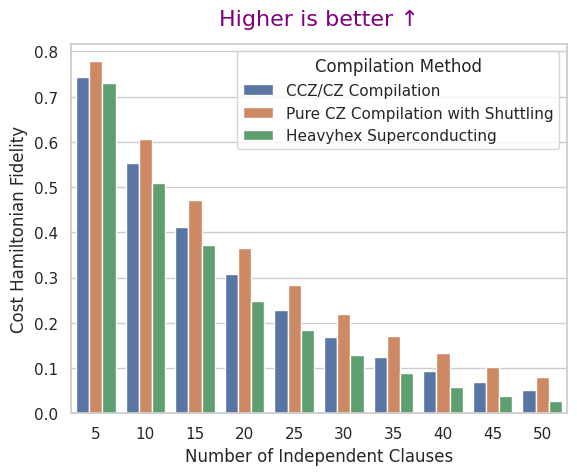

In [132]:
data = {
    "#Clauses": [],
    "Fidelity": [],
    "Compilation Method": []
}

num_clauses = 5
for r in multi_qubit_stats:
    data["#Clauses"].append(num_clauses)
    data["Fidelity"].append(r["fidelity"])
    data["Compilation Method"].append("CCZ/CZ Compilation")
    num_clauses += 5
num_clauses = 5
for r in two_qubit_stats:
    data["#Clauses"].append(num_clauses)
    data["Fidelity"].append(r["fidelity"])
    data["Compilation Method"].append("Pure CZ Compilation with Shuttling")
    num_clauses += 5
num_clauses = 5
for r in superconducting_stats:
    data["#Clauses"].append(num_clauses)
    data["Fidelity"].append(r["fidelity"])
    data["Compilation Method"].append("Heavyhex Superconducting")
    num_clauses += 5

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="#Clauses", y="Fidelity", hue="Compilation Method", data=data)
plt.annotate(
    'Higher is better ↑',
    xy=(0.5, 1.05),
    xycoords='axes fraction',
    fontsize=16,
    color='purple',
    ha='center'
)
plt.xlabel("Number of Independent Clauses")
plt.ylabel("Cost Hamiltonian Fidelity")
plt.savefig("./plots/fpqa_compilation_method_fidelity.pdf", bbox_inches="tight")
plt.savefig("./plots/fpqa_compilation_method_fidelity.png", bbox_inches="tight")
plt.show()

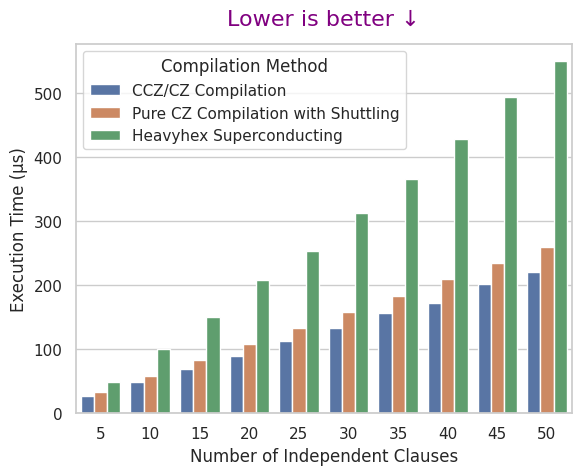

In [130]:
data = {
    "#Clauses": [],
    "Duration": [],
    "Compilation Method": []
}

num_clauses = 5
for r in multi_qubit_stats:
    data["#Clauses"].append(num_clauses)
    data["Duration"].append(r["duration"])
    data["Compilation Method"].append("CCZ/CZ Compilation")
    num_clauses += 5
num_clauses = 5
for r in two_qubit_stats:
    data["#Clauses"].append(num_clauses)
    data["Duration"].append(r["duration"])
    data["Compilation Method"].append("Pure CZ Compilation with Shuttling")
    num_clauses += 5
num_clauses = 5
for r in superconducting_stats:
    data["#Clauses"].append(num_clauses)
    data["Duration"].append(r["duration"])
    data["Compilation Method"].append("Heavyhex Superconducting")
    num_clauses += 5

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="#Clauses", y="Duration", hue="Compilation Method", data=data)
plt.annotate(
    'Lower is better ↓',
    xy=(0.5, 1.05),
    xycoords='axes fraction',
    fontsize=16,
    color='purple',
    ha='center'
)
plt.ylabel("Execution Time (μs)")
plt.xlabel("Number of Independent Clauses")
plt.savefig("./plots/fpqa_compilation_method_duration.pdf", bbox_inches="tight")
plt.savefig("./plots/fpqa_compilation_method_duration.png", bbox_inches="tight")
plt.show()

In [ ]:
data = {
    "#Clauses": [],
    "Fidelity": [],
    "Compilation Method": []
}

num_clauses = 5
for r in multi_qubit_stats:
    data["#Clauses"].append(num_clauses)
    data["Fidelity"].append(r["fidelity"])
    data["Compilation Method"].append("CCZ/CZ Compilation")
    num_clauses += 5
num_clauses = 5
for r in two_qubit_stats:
    data["#Clauses"].append(num_clauses)
    data["Fidelity"].append(r["fidelity"])
    data["Compilation Method"].append("Pure CZ Compilation with Shuttling")
    num_clauses += 5
num_clauses = 5
for r in superconducting_stats:
    data["#Clauses"].append(num_clauses)
    data["Fidelity"].append(r["fidelity"])
    data["Compilation Method"].append("Heavyhex Superconducting")
    num_clauses += 5

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="#Clauses", y="Fidelity", hue="Compilation Method", data=data)
plt.annotate(
    'Higher is better ↑',
    xy=(0.5, 1.05),
    xycoords='axes fraction',
    fontsize=16,
    color='purple',
    ha='center'
)
plt.xlabel("Cost Hamiltonian Fidelity")
plt.ylabel("Number of Independent Clauses")
plt.savefig("./plots/fpqa_compilation_method_fidelity.pdf", bbox_inches="tight")
plt.savefig("./plots/fpqa_compilation_method_fidelity.png", bbox_inches="tight")
plt.show()

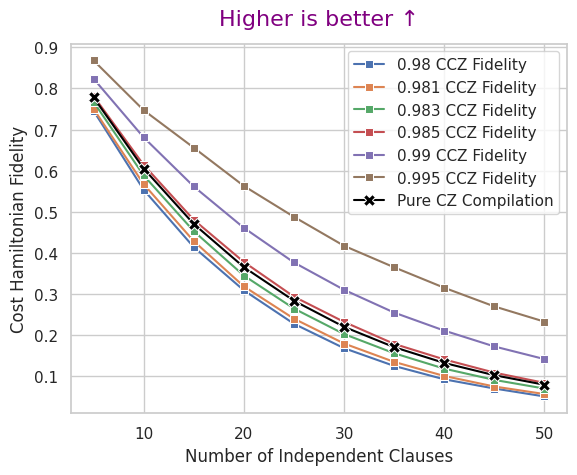

In [116]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=[i for i in range(5, 51, 5)], y=[o["fidelity"] for o in fidelity_breakpoint_stats[0]], marker="s", label="0.98 CCZ Fidelity")
sns.lineplot(x=[i for i in range(5, 51, 5)], y=[o["fidelity"] for o in fidelity_breakpoint_stats[1]], marker="s", label="0.981 CCZ Fidelity")
sns.lineplot(x=[i for i in range(5, 51, 5)], y=[o["fidelity"] for o in fidelity_breakpoint_stats[3]], marker="s", label="0.983 CCZ Fidelity")
sns.lineplot(x=[i for i in range(5, 51, 5)], y=[o["fidelity"] for o in fidelity_breakpoint_stats[5]], marker="s", label="0.985 CCZ Fidelity")
sns.lineplot(x=[i for i in range(5, 51, 5)], y=[o["fidelity"] for o in fidelity_breakpoint_stats[10]], marker="s", label="0.99 CCZ Fidelity")
sns.lineplot(x=[i for i in range(5, 51, 5)], y=[o["fidelity"] for o in fidelity_breakpoint_stats[15]], marker="s", label="0.995 CCZ Fidelity")
ax = sns.lineplot(x=[i for i in range(5, 51, 5)], y=[o["fidelity"] for o in two_qubit_stats], marker="X", label="Pure CZ Compilation")
ax.lines[-1].set_color("black")
ax.lines[-1].set_markersize(8)
plt.legend()
plt.annotate(
    'Higher is better ↑',      # Text to display
    xy=(0.5, 1.05),           # Coordinates (x, y) for the annotation
    xycoords='axes fraction',  # Coordinate system used (axes fraction means 0 to 1 scale)
    fontsize=16,               # Font size of the text
    color='purple',              # Color of the text
    ha='center'                 # Horizontal alignment of the text
)
plt.xlabel("Number of Independent Clauses")
plt.ylabel("Cost Hamiltonian Fidelity")
plt.savefig("./plots/fpqa_fidelity_breakpoint.pdf", bbox_inches="tight")
plt.savefig("./plots/fpqa_fidelity_breakpoint.png", bbox_inches="tight")
plt.show()